In [104]:
from sympy import *
from IPython.display import Math

In [45]:
a = Rational(1,2)
a = Rational(0.5)
a

1/2

In [39]:
a = Float(1/2)
a

0.500000000000000

In [51]:
a = Integer(2)
sqrt(2)

sqrt(2)

In [54]:
sqrt(-1)

I

In [80]:
sqrt(E*pi)

sqrt(pi)*exp(1/2)

In [86]:
re(2)

2

In [65]:
x = Symbol('x')
x1 = Symbol('x_{1}')
x_a1 = Symbol('x_{a_{1}}')
x+x1+x_a1

x + x_{1} + x_{a_{1}}

In [66]:
x = Symbol('x')
y = Symbol('y')
expr = (x+y)**3
expr

(x + y)**3

In [67]:
expr_ex = expand(expr)
expr_ex

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [68]:
expr_ft = factor(expr_ex)
expr_ft

(x + y)**3

In [72]:
expr = x + y**2 - 4
# solve(expr, x)[0]
solve(expr, y)

[-sqrt(4 - x), sqrt(4 - x)]

In [74]:
expr = x**3 + 2*x**2 - 5*x
diff(expr)

3*x**2 + 4*x - 5

In [90]:
integrate(expr)

x**4/4 + 2*x**3/3 - 5*x**2/2

In [66]:
rho = Symbol('\\rho')

# y(long)
v1y = Symbol('v_{1y}')
v2y = Symbol('v_{1y}')
ay_max = Symbol('a_{y;max}^{Accel}')
by_min = Symbol('a_{y;min}^{Brake}')
by_max = Symbol('a_{y;max}^{Brake}')

# x (lat)
mu_y = Symbol('\mu_y')
v1x = Symbol('v_{1x}')
v2x = Symbol('v_{2x}')
ax_max = Symbol('a_{y;max}^{Accel}')
bx_min = Symbol('a_{y;min}^{Brake}')


In [67]:
dy = (v1y*rho + ay_max*rho**2/2 + (v1y + rho*ay_max)**2/(2*b1y_min)) - ( v2y**2/(2*by_max)) 
dx = mu_y + (v1x*rho +  ax_max*rho**2/2 + (v1x + rho*ax_max)**2/(2*bx_min)) -  (v2x*rho +  ax_max*rho**2/2 + (v2x + rho*ax_max)**2/(2*bx_min)) 

display(dy)
display(dx)

\rho**2*a_{y;max}^{Accel}/2 + \rho*v_{1y} + (\rho*a_{y;max}^{Accel} + v_{1y})**2/(2*a_{y;min}^{Brake}) - v_{1y}**2/(2*a_{y;max}^{Brake})

\mu_y + \rho*v_{1x} - \rho*v_{2x} + (\rho*a_{y;max}^{Accel} + v_{1x})**2/(2*a_{y;min}^{Brake}) - (\rho*a_{y;max}^{Accel} + v_{2x})**2/(2*a_{y;min}^{Brake})

In [135]:
var('t')
rho = Symbol('\\rho')

# t < t_b
a1y_tb = Symbol('a_{y1;t_b}')
v1y_tb = Symbol('v_{y1;t_b}')
p1y_tb = Symbol('p_{y1;t_b}')

c1 = 't \in [t_b, t_b + \\rho]'
a1y_t1 = a1y_tb
v1y_t1 = v1y_tb + integrate(a1y_t1,t)
p1y_t1 = p1y_tb + integrate(v1y_t1,t)

# t_b < t < t_stop
v1y_tr = v1y_t1.subs(t, rho)
p1y_tr = p1y_t1.subs(t, rho)

c2 = 't \in [t_b + \\rho, t_{stop}]'
b1y = Symbol('a_1^{Brake}')
var('V1, P1')

a1y_t2 = -b1y
v1y_t2 = V1 + integrate(a1y_t2,t)
p1y_t2 = P1 + integrate(v1y_t2,t)

display(Math(r'a_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} '
             % (latex(a1y_t1),c1,latex(a1y_t2),c2)))
display(Math(r'v_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} '
             % (latex(v1y_t1),c1,latex(v1y_t2),c2)))
display(Math(r'p_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} ' 
             % (latex(p1y_t1),c1,latex(p1y_t2),c2)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [152]:
# V1 を求めて代入
V1subs = solve(v1y_t2.subs(t,rho) - v1y_t1.subs(t,rho), V1)[0]
v1y_t2_ = collect(simplify(v1y_t2.subs(V1, V1subs)),(t,rho))

# P1 を求めて代入
P1subs = solve(p1y_t2.subs(t,rho) - p1y_t1.subs(t,rho), P1)[0]
p1y_t2_ = collect(simplify(p1y_t2.subs(P1, P1subs).subs(V1, V1subs)),(t,rho))

display(
    Math(r'a_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} '
             % (latex(a1y_t1),c1,latex(a1y_t2),c2)),
    Math(r'v_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} '
             % (latex(v1y_t1),c1,latex(v1y_t2_),c2)),
    Math(r'p_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} ' 
             % (latex(p1y_t1),c1,latex(p1y_t2_),c2))
)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [162]:
print(r'p_{1y}(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases}' % (latex(p1y_t1),c1,latex(p1y_t2_),c2))

p_{1y}(t) = \begin{cases} \frac{a_{y1;t_b} t^{2}}{2} + p_{y1;t_b} + t v_{y1;t_b} & (t \in [t_b, t_b + \rho]) \\ \rho^{2} \left(- \frac{a_1^{Brake}}{2} - \frac{a_{y1;t_b}}{2}\right) - \frac{a_1^{Brake} t^{2}}{2} + p_{y1;t_b} + t \left(\rho a_1^{Brake} + \rho a_{y1;t_b} + v_{y1;t_b}\right) & (t \in [t_b + \rho, t_{stop}])\end{cases}


In [163]:
latex(p1y_t2_)

'\\rho^{2} \\left(- \\frac{a_1^{Brake}}{2} - \\frac{a_{y1;t_b}}{2}\\right) - \\frac{a_1^{Brake} t^{2}}{2} + p_{y1;t_b} + t \\left(\\rho a_1^{Brake} + \\rho a_{y1;t_b} + v_{y1;t_b}\\right)'

In [146]:
t_stop = solve(v1y_t2_, t)[0]

p1y_ts = p1y_t2_.subs(t, t_stop)
collect(p1y_ts.expand(), (v1y_tb, rho))

\rho**2*(a_{y1;t_b}/2 + a_{y1;t_b}**2/(2*a_1^{Brake})) + p_{y1;t_b} + v_{y1;t_b}*(\rho + \rho*a_{y1;t_b}/a_1^{Brake}) + v_{y1;t_b}**2/(2*a_1^{Brake})

In [128]:
b2y = Symbol('a_2^{Brake}')
v2y_tb = Symbol('v_{y2;t_b}')
p2y_tb = Symbol('p_{y2;t_b}')

a2y_t = -b2y
v2y_t = v2y_tb + integrate(a2y_t,t)
p2y_t = p2y_tb + integrate(v2y_t,t)

display(
    Math(r'a_{2y}(t) = %s'
             % latex(a2y_t)),
    Math(r'v_{2y}(t) = %s'
             % latex(v2y_t)),
    Math(r'p_{2y}(t) = %s'
             % latex(p2y_t)),
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [132]:
d_t1 = collect(p1y_t1 - p2y_t,t)
d_t2 = collect(p1y_t2_ - p2y_t,t)
display(
    Math(r'd_y(t) = \begin{cases} %s & (%s) \\ %s & (%s)\end{cases} '
             % (latex(d_t1),c1,latex(d_t2),c2)),
)

<IPython.core.display.Math object>

In [113]:
c1 = 't \lt t_b'
c2 = 't \geq t_b'
display(Math(r'\begin{cases} %s & (%s) \\ %s & (%s)\end{cases} ' % (1,c1,2,c2)))

<IPython.core.display.Math object>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

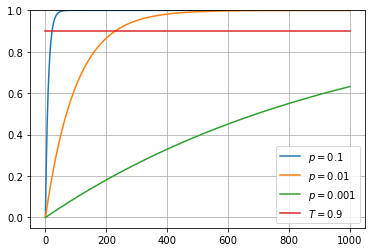

In [39]:

N = np.arange(0,1000,1)
p = 0.1
P1 = 1-(1-p)**N
p = 0.01
P2 = 1-(1-p)**N
p = 0.001
P3 = 1-(1-p)**N
T = np.ones(1000)*0.9
plt.grid(b=True)
plt.plot(N, P1, label='$ p = 0.1 $')
plt.plot(N, P2, label='$ p = 0.01 $')
plt.plot(N, P3, label='$ p = 0.001 $')
plt.plot(N, T, label='$ T = 0.9 $')
plt.legend()
plt.ylim(-0.05, 1)
plt.show()

In [47]:
p = np.array([0.1, 0.01, 0.001])
T = 0.9
N = np.log(1-T)/np.log(1-p)
list(np.ceil(N))

[22.0, 230.0, 2302.0]

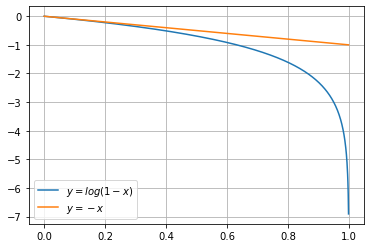

In [54]:
x = np.arange(0, 1, 0.001)
plt.grid(b=True)
plt.plot(x, np.log(1-x), label='$ y = log(1-x) $')
plt.plot(x, -x, label='$ y = -x $')
plt.legend()
plt.show()